In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas_datareader.data as web
import talib as ta

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

pd.set_option('display.notebook_repr_html', False)

from __future__ import division
import scipy.sparse as ss
import pylab as pl
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import Binarizer

%matplotlib inline
plt.style.use('seaborn')
%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data

C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


In [9]:
# In R, I exported the dataset to a csv file. It is part of the base R distribution.
df = pd.read_csv('USArrests.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
Murder      50 non-null float64
Assault     50 non-null int64
UrbanPop    50 non-null int64
Rape        50 non-null float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [11]:
df.mean(), df.var(), df.head()

(Murder        7.788
 Assault     170.760
 UrbanPop     65.540
 Rape         21.232
 dtype: float64, Murder        18.970465
 Assault     6945.165714
 UrbanPop     209.518776
 Rape          87.729159
 dtype: float64,             Murder  Assault  UrbanPop  Rape
 Alabama       13.2      236        58  21.2
 Alaska        10.0      263        48  44.5
 Arizona        8.1      294        80  31.0
 Arkansas       8.8      190        50  19.5
 California     9.0      276        91  40.6)

In [14]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

              Murder   Assault  UrbanPop      Rape
Alabama     1.255179  0.790787 -0.526195 -0.003451
Alaska      0.513019  1.118060 -1.224067  2.509424
Arizona     0.072361  1.493817  1.009122  1.053466
Arkansas    0.234708  0.233212 -1.084492 -0.186794
California  0.281093  1.275635  1.776781  2.088814

In [15]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

                V1        V2        V3        V4
Murder    0.535899  0.418181 -0.341233  0.649228
Assault   0.583184  0.187986 -0.268148 -0.743407
UrbanPop  0.278191 -0.872806 -0.378016  0.133878
Rape      0.543432 -0.167319  0.817778  0.089024

In [16]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot

                     PC1       PC2       PC3       PC4
Alabama         0.985566  1.133392 -0.444269  0.156267
Alaska          1.950138  1.073213  2.040003 -0.438583
Arizona         1.763164 -0.745957  0.054781 -0.834653
Arkansas       -0.141420  1.119797  0.114574 -0.182811
California      2.523980 -1.542934  0.598557 -0.341996
Colorado        1.514563 -0.987555  1.095007  0.001465
Connecticut    -1.358647 -1.088928 -0.643258 -0.118469
Delaware        0.047709 -0.325359 -0.718633 -0.881978
Florida         3.013042  0.039229 -0.576829 -0.096285
Georgia         1.639283  1.278942 -0.342460  1.076797
Hawaii         -0.912657 -1.570460  0.050782  0.902807
Idaho          -1.639800  0.210973  0.259801 -0.499104
Illinois        1.378911 -0.681841 -0.677496 -0.122021
Indiana        -0.505461 -0.151563  0.228055  0.424666
Iowa           -2.253646 -0.104054  0.164564  0.017556
Kansas         -0.796881 -0.270165  0.025553  0.206496
Kentucky       -0.750859  0.958440 -0.028369  0.670557
Louisiana 

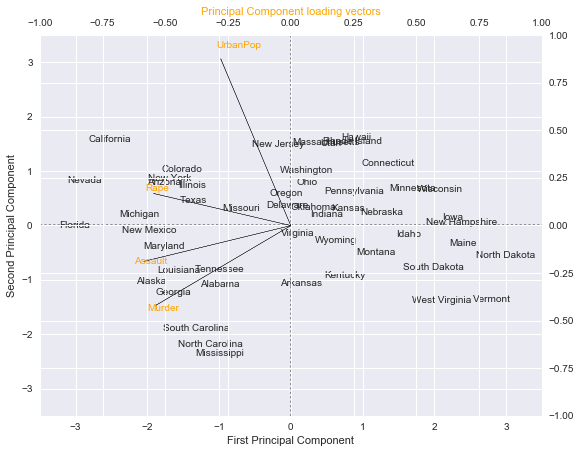

In [17]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3]);

In [18]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([ 1.57487827,  0.99486941,  0.59712912,  0.41644938])

In [19]:
pca.explained_variance_ratio_

array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752])

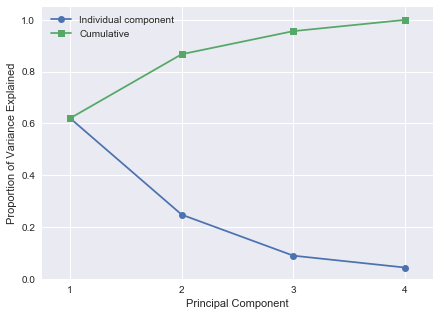

In [23]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

### K-means

In [24]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [25]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [32]:
km1.inertia_

99.305783979146852

In [27]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
pd.Series(km2.labels_).value_counts()

1    21
0    20
2     9
dtype: int64

In [29]:
km2.cluster_centers_

array([[-0.27876523,  0.51224152],
       [ 2.82805911, -4.11351797],
       [ 0.69945422, -2.14934345]])

In [30]:
km2.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2])

In [31]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

68.973792009397258

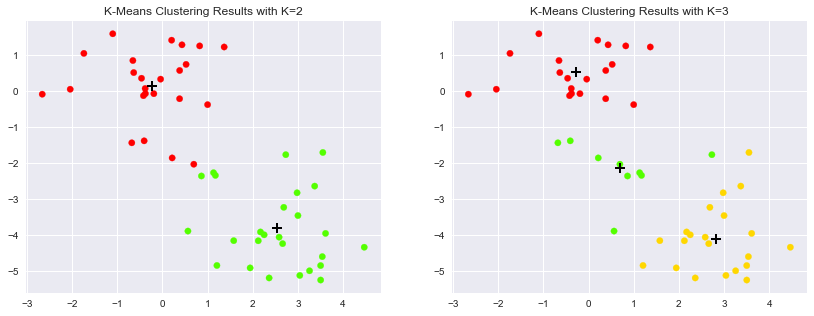

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### 10.5.3 Hierarchical Clustering

#### scipy

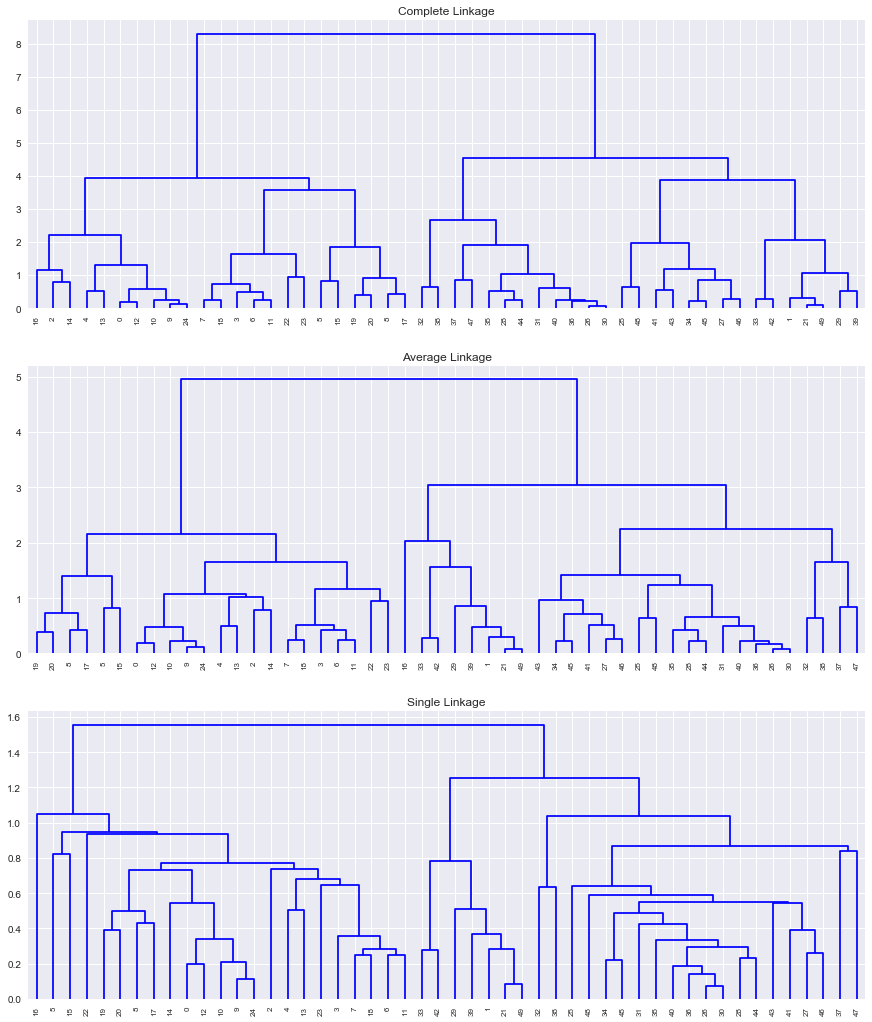

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=0)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

## Lab 3: NCI60 Data Example

### § 10.6.1 PCA

In [48]:
df2 = pd.read_csv('NCI60_X.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [49]:
X = pd.DataFrame(scale(df2))
X.shape

(64, 6830)

In [55]:
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])
y.shape

(64, 1)

In [60]:
y.type.value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
BREAST         7
COLON          7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7A-repro    1
K562A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: type, dtype: int64

In [61]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

In [63]:
df2_plot.shape

(64, 64)

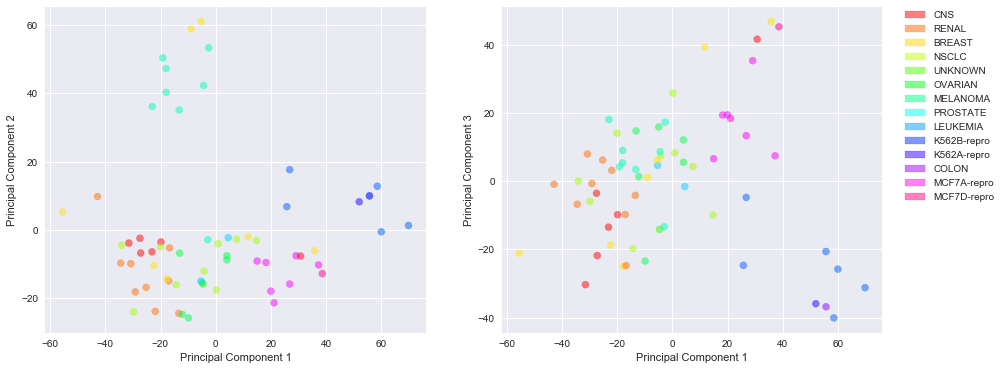

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv

# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')

# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)

for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')    

In [64]:
labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int64),
 array(['CNS', 'RENAL', 'BREAST', 'NSCLC', 'UNKNOWN', 'OVARIAN', 'MELANOMA',
        'PROSTATE', 'LEUKEMIA', 'K562B-repro', 'K562A-repro', 'COLON',
        'MCF7A-repro', 'MCF7D-repro'], dtype=object))

In [66]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).as_matrix(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
             index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
             columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

                              PC1        PC2        PC3        PC4        PC5
Standard Deviation      27.853469  21.481355  19.820465  17.032556  15.971807
Proportion of Variance   0.113589   0.067562   0.057518   0.042476   0.037350
Cumulative Proportion    0.113589   0.181151   0.238670   0.281145   0.318495

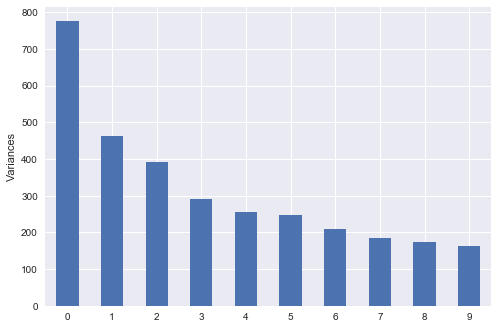

In [67]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances');

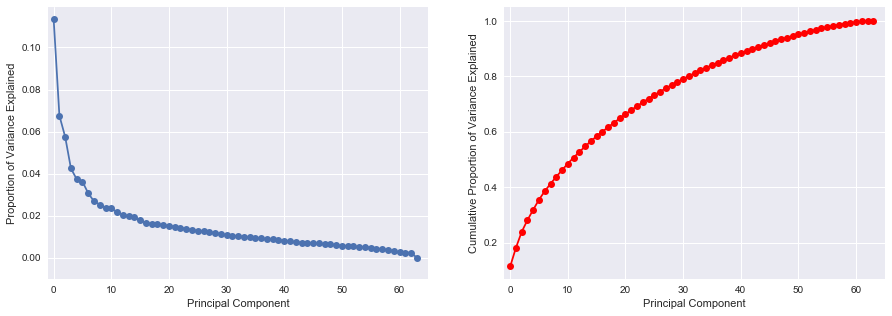

In [68]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)    

### § 10.6.2 Clustering

In [73]:
X= pd.DataFrame(scale(df2), index=y.type, columns=df2.columns)

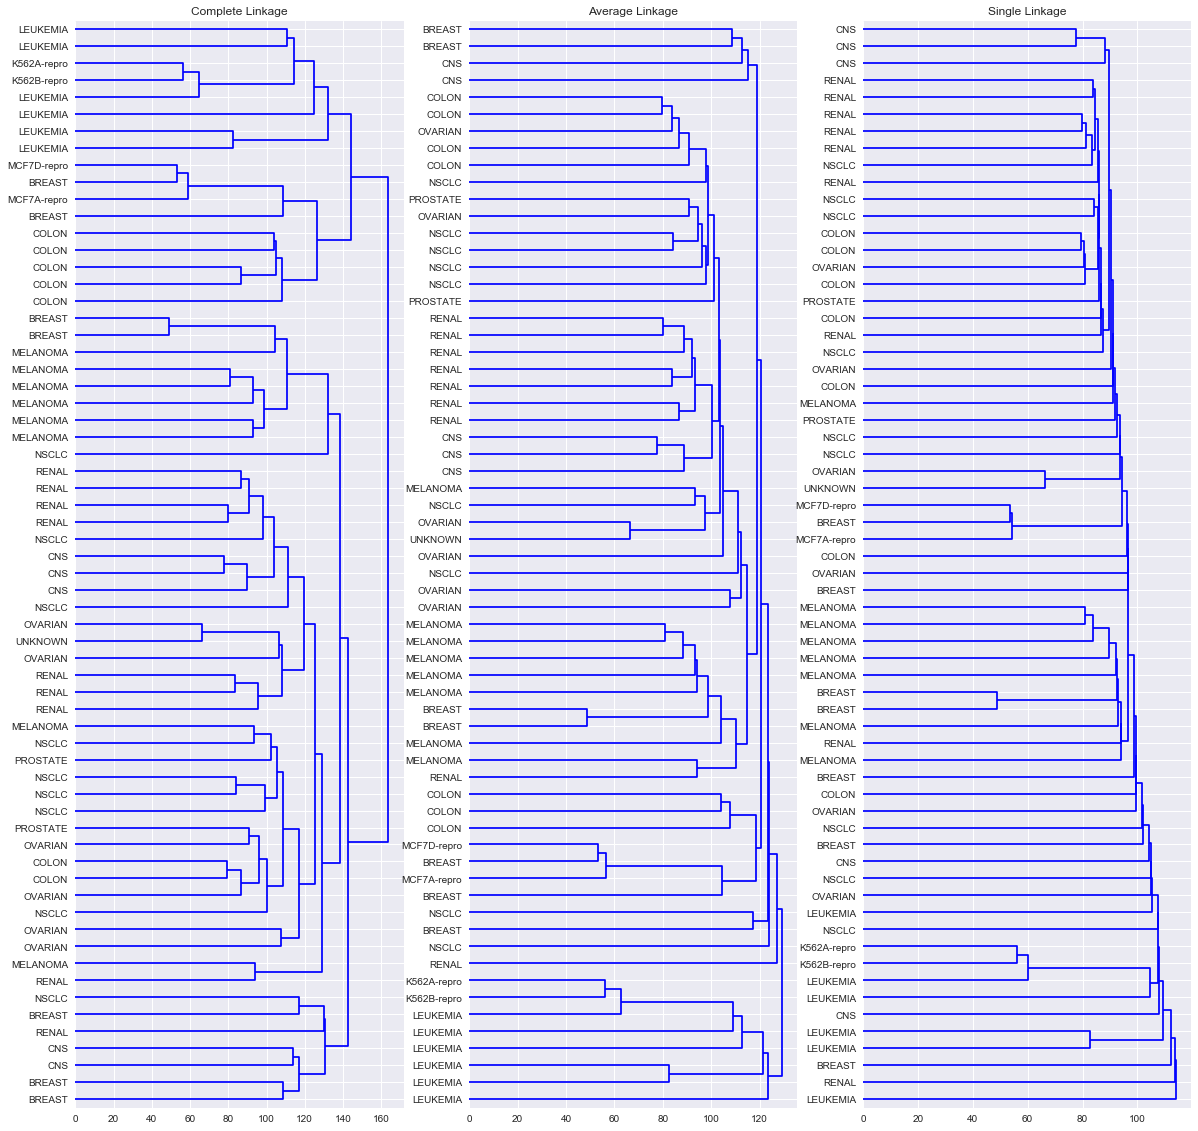

In [74]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, labels=X.index, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

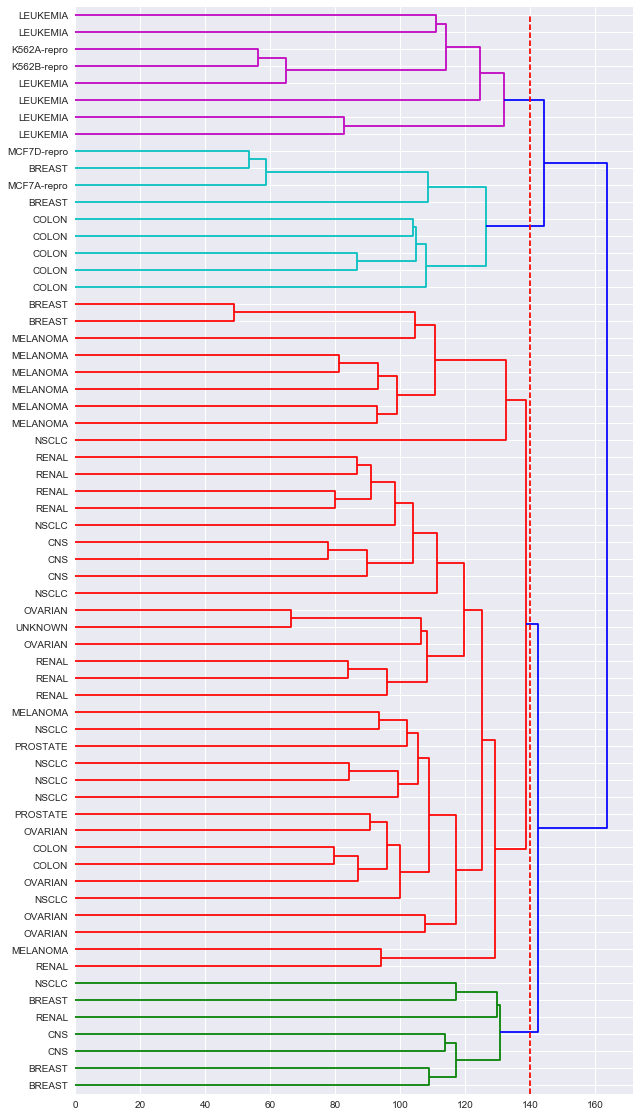

In [75]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(X),
                            labels=X.index, orientation='right', color_threshold=140, leaf_font_size=10)
plt.vlines(140,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

#### KMeans

In [76]:
np.random.seed(2)
km4 = KMeans(n_clusters=4, n_init=50)
km4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
km4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [78]:
# Observations per KMeans cluster
pd.Series(km4.labels_).value_counts().sort_index()

0     8
1    23
2    24
3     9
dtype: int64

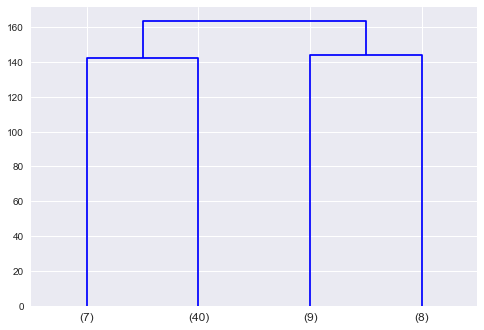

In [79]:
# Observations per Hierarchical cluster
cut4b = hierarchy.dendrogram(hierarchy.complete(X), truncate_mode='lastp', p=4, show_leaf_counts=True)

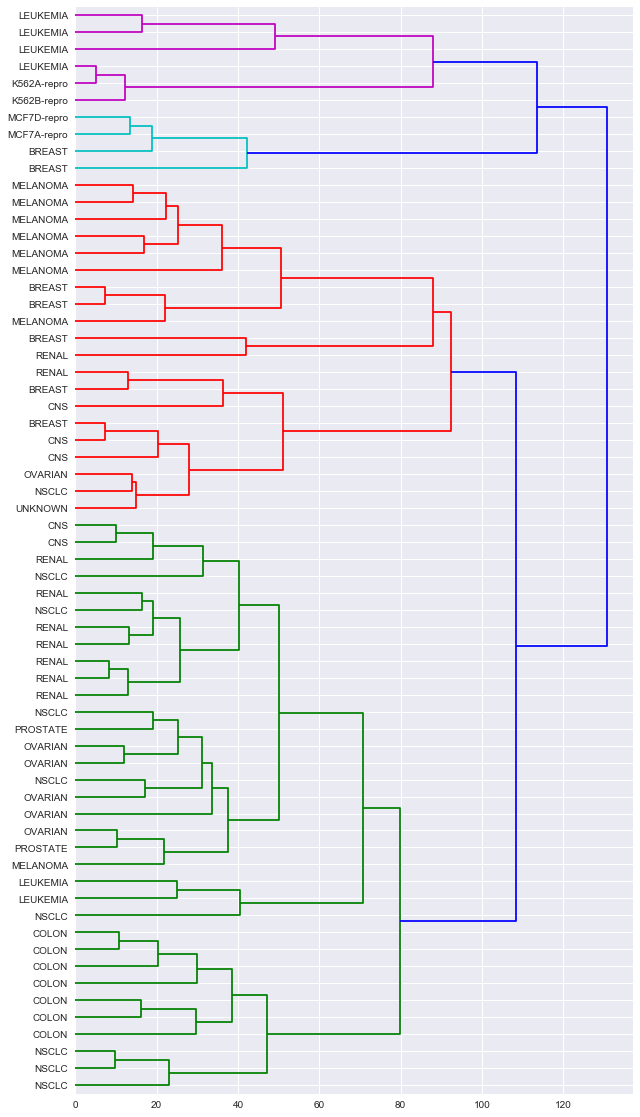

In [80]:
# Hierarchy based on Principal Components 1 to 5
plt.figure(figsize=(10,20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(df2_plot.iloc[:,:5]), labels=y.type.values, orientation='right', color_threshold=100, leaf_font_size=10)

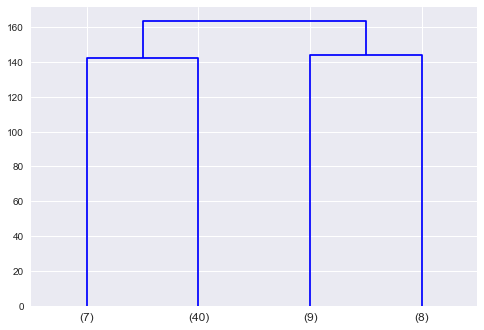

In [81]:
cut4c = hierarchy.dendrogram(hierarchy.complete(df2_plot), truncate_mode='lastp', p=4,
                             show_leaf_counts=True)
# See also color coding in plot above.

### gspc2 data and K-means

In [87]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 2, 27)
gspc2 = web.DataReader("^GSPC", 'yahoo', start, end)
gspc2.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
gspc2['pct_change'] = gspc2['Adj_Close'].pct_change()

gspc2['pct_change_lag1'] = gspc2['pct_change'].shift(1)


gspc2['pct_change_lag2'] = gspc2['Adj_Close'].pct_change(2)
gspc2['pct_change_lag3'] = gspc2['Adj_Close'].pct_change(3)
gspc2['pct_change_lag4'] = gspc2['Adj_Close'].pct_change(4)
gspc2['pct_change_lag5'] = gspc2['Adj_Close'].pct_change(5)
gspc2['pct_change_lag6'] = gspc2['Adj_Close'].pct_change(6)
gspc2['pct_change_lag7'] = gspc2['Adj_Close'].pct_change(7)
gspc2['pct_change_lag8'] = gspc2['Adj_Close'].pct_change(8)

gspc2['pct_change_lag2'] = gspc2['pct_change_lag2'].shift(1)
gspc2['pct_change_lag3'] = gspc2['pct_change_lag3'].shift(1)
gspc2['pct_change_lag4'] = gspc2['pct_change_lag4'].shift(1)
gspc2['pct_change_lag5'] = gspc2['pct_change_lag5'].shift(1)
gspc2['pct_change_lag6'] = gspc2['pct_change_lag6'].shift(1)
gspc2['pct_change_lag7'] = gspc2['pct_change_lag7'].shift(1)
gspc2['pct_change_lag8'] = gspc2['pct_change_lag8'].shift(1)


gspc2['day_lag1'] = gspc2['pct_change'].shift(1)
gspc2['day_lag2'] = gspc2['pct_change'].shift(2)
gspc2['day_lag3'] = gspc2['pct_change'].shift(3)
gspc2['day_lag4'] = gspc2['pct_change'].shift(4)
gspc2['day_lag5'] = gspc2['pct_change'].shift(5)
gspc2['day_lag6'] = gspc2['pct_change'].shift(6)
gspc2['day_lag7'] = gspc2['pct_change'].shift(7)
gspc2['day_lag8'] = gspc2['pct_change'].shift(8)
# gspc2['pct_change1'] = gspc2['Adj_Close'].shift(-1) / gspc2['Adj_Close']  - 1
# gspc2['pct_change2'] = gspc2['Adj_Close'].shift(-2) / gspc2['Adj_Close']  - 1
# gspc2['pct_change3'] = gspc2['Adj_Close'].shift(-3) / gspc2['Adj_Close']  - 1
# gspc2['pct_change4'] = gspc2['Adj_Close'].shift(-4) / gspc2['Adj_Close']  - 1
# gspc2['pct_change5'] = gspc2['Adj_Close'].shift(-5) / gspc2['Adj_Close']  - 1
# gspc2['pct_change6'] = gspc2['Adj_Close'].shift(-6) / gspc2['Adj_Close']  - 1
# gspc2['pct_change7'] = gspc2['Adj_Close'].shift(-7) / gspc2['Adj_Close']  - 1
# gspc2['pct_change8'] = gspc2['Adj_Close'].shift(-8) / gspc2['Adj_Close']  - 1

# gspc2 = gspc2.ix[(gspc2['pct_change'] > 0.0200)]
gspc2['lr3_10'], gspc2['lr3_10signal'], gspc2['hist'] = ta.MACDEXT(gspc2.Adj_Close.values, fastperiod=3, fastmatype=0, slowperiod=10, slowmatype=0, signalperiod=16, signalmatype=0)
gspc2['lr3_10_lag1'] = gspc2.lr3_10.shift(1)
gspc2['lr3_10_lag2'] = gspc2.lr3_10.shift(2)
gspc2['lr3_10_lag3'] = gspc2.lr3_10.shift(3)
gspc2['lr3_10_lag4'] = gspc2.lr3_10.shift(4)
gspc2['lr3_10_lag5'] = gspc2.lr3_10.shift(5)
gspc2['lr3_10signal_lag1'] = gspc2.lr3_10signal.shift(1)
gspc2['lr3_10signal_lag2'] = gspc2.lr3_10signal.shift(2)
gspc2['lr3_10signal_lag3'] = gspc2.lr3_10signal.shift(3)
gspc2['lr3_10signal_lag4'] = gspc2.lr3_10signal.shift(4)
gspc2['lr3_10signal_lag5'] = gspc2.lr3_10signal.shift(5)
gspc2['hist_lag1'] = gspc2['hist'].shift(1)
gspc2['hist_lag2'] = gspc2['hist'].shift(2)
gspc2['hist_lag3'] = gspc2['hist'].shift(3)
gspc2['hist_lag4'] = gspc2['hist'].shift(4)
gspc2['hist_lag5'] = gspc2['hist'].shift(5)
gspc2['rsi14'] = ta.RSI(gspc2.Adj_Close.values, timeperiod=14)
gspc2['rsi14_lag1'] = gspc2.rsi14.shift(1)
gspc2['rsi14_lag2'] = gspc2.rsi14.shift(2)
gspc2['rsi14_lag3'] = gspc2.rsi14.shift(3)
gspc2['rsi14_lag4'] = gspc2.rsi14.shift(4)
gspc2['rsi14_lag5'] = gspc2.rsi14.shift(5)
# gspc2['upperband'], gspc2['middleband'], gspc2['lowerband'] = ta.BBANDS(gspc2.Adj_Close.values, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
# # BB crossed down and up categorical labels
# gspc2.ix[(gspc2['Adj_Close'] <= gspc2['lowerband']) , 'crossed_down'] = 1
# gspc2.ix[(gspc2['Adj_Close'] > gspc2['lowerband']) , 'crossed_down'] = 0
# gspc2.ix[(gspc2['Adj_Close'] >= gspc2['upperband']) , 'crossed_up'] = 1
# gspc2.ix[(gspc2['Adj_Close'] < gspc2['upperband']) , 'crossed_up'] = 0
gspc2['mama'], gspc2['fama'] = ta.MAMA(gspc2.Adj_Close.values, fastlimit=0.5, slowlimit=0.05)
gspc2['hilbert'] = ta.HT_TRENDLINE(gspc2.Adj_Close.values)
gspc2['atr'] = ta.ATR(gspc2.High.values, gspc2.Low.values, gspc2.Close.values, timeperiod=14)
gspc2.ix[gspc2['pct_change'] >= 0, 'direction'] = 1
gspc2.ix[gspc2['pct_change'] < 0, 'direction'] = 0
gspc2['direction_lag1'] = gspc2['direction'].shift(1)
gspc2['direction_lag2'] = gspc2['direction'].shift(2)
gspc2['direction_lag3'] = gspc2['direction'].shift(3)
gspc2['direction_lag4'] = gspc2['direction'].shift(4)
gspc2['direction_lag5'] = gspc2['direction'].shift(5)
gspc2['direction_lag6'] = gspc2['direction'].shift(6)
gspc2['direction_lag7'] = gspc2['direction'].shift(7)
gspc2['direction_lag8'] = gspc2['direction'].shift(8)

# gspc2.ix[gspc2['pct_change2'] >= 0, 'pct_change2_yn'] = 1
# gspc2.ix[gspc2['pct_change2'] < 0, 'pct_change2_yn'] = 0
# gspc2.ix[gspc2['pct_change3'] >= 0, 'pct_change3_yn'] = 1
# gspc2.ix[gspc2['pct_change3'] < 0, 'pct_change3_yn'] = 0
# gspc2.ix[gspc2['pct_change4'] >= 0, 'pct_change4_yn'] = 1
# gspc2.ix[gspc2['pct_change4'] < 0, 'pct_change4_yn'] = 0
# gspc2.ix[gspc2['pct_change5'] >= 0, 'pct_change5_yn'] = 1
# gspc2.ix[gspc2['pct_change5'] < 0, 'pct_change5_yn'] = 0
# gspc2.ix[gspc2['pct_change6'] >= 0, 'pct_change6_yn'] = 1
# gspc2.ix[gspc2['pct_change6'] < 0, 'pct_change6_yn'] = 0
# gspc2.ix[gspc2['pct_change7'] >= 0, 'pct_change7_yn'] = 1
# gspc2.ix[gspc2['pct_change7'] < 0, 'pct_change7_yn'] = 0

gspc2.head(20)
gspc2.dropna(axis=0,inplace=True)
# gspc2[pd.isnull(gspc2).any(axis=1)]
gspc2['High_shift2'] = gspc2.High.shift(2)
gspc2['Low_shift2'] = gspc2.Low.shift(2)
gspc2['Close_shift2'] = gspc2.Close.shift(2)
gspc2['Open_dev_close_shift2'] = gspc2.Open / gspc2.Close_shift2
gspc2['High_dev_close_shift2'] = gspc2.Open / gspc2.High_shift2
gspc2['Low_dev_close_shift2'] = gspc2.Open / gspc2.Low_shift2
gspc2.dropna(axis=0,inplace=True)
gspc3 = gspc2[[ 'Open', 'Volume' , 'direction_lag1', 'direction_lag2','lr3_10_lag1', 'lr3_10_lag2', 'lr3_10_lag3', \
               'direction', 'High_shift2', 'Low_shift2', 'Close_shift2', 'Open_dev_close_shift2', \
               'High_dev_close_shift2',
       'Low_dev_close_shift2']]


In [88]:
gspc3.columns

Index(['Open', 'Volume', 'direction_lag1', 'direction_lag2', 'lr3_10_lag1',
       'lr3_10_lag2', 'lr3_10_lag3', 'direction', 'High_shift2', 'Low_shift2',
       'Close_shift2', 'Open_dev_close_shift2', 'High_dev_close_shift2',
       'Low_dev_close_shift2'],
      dtype='object')

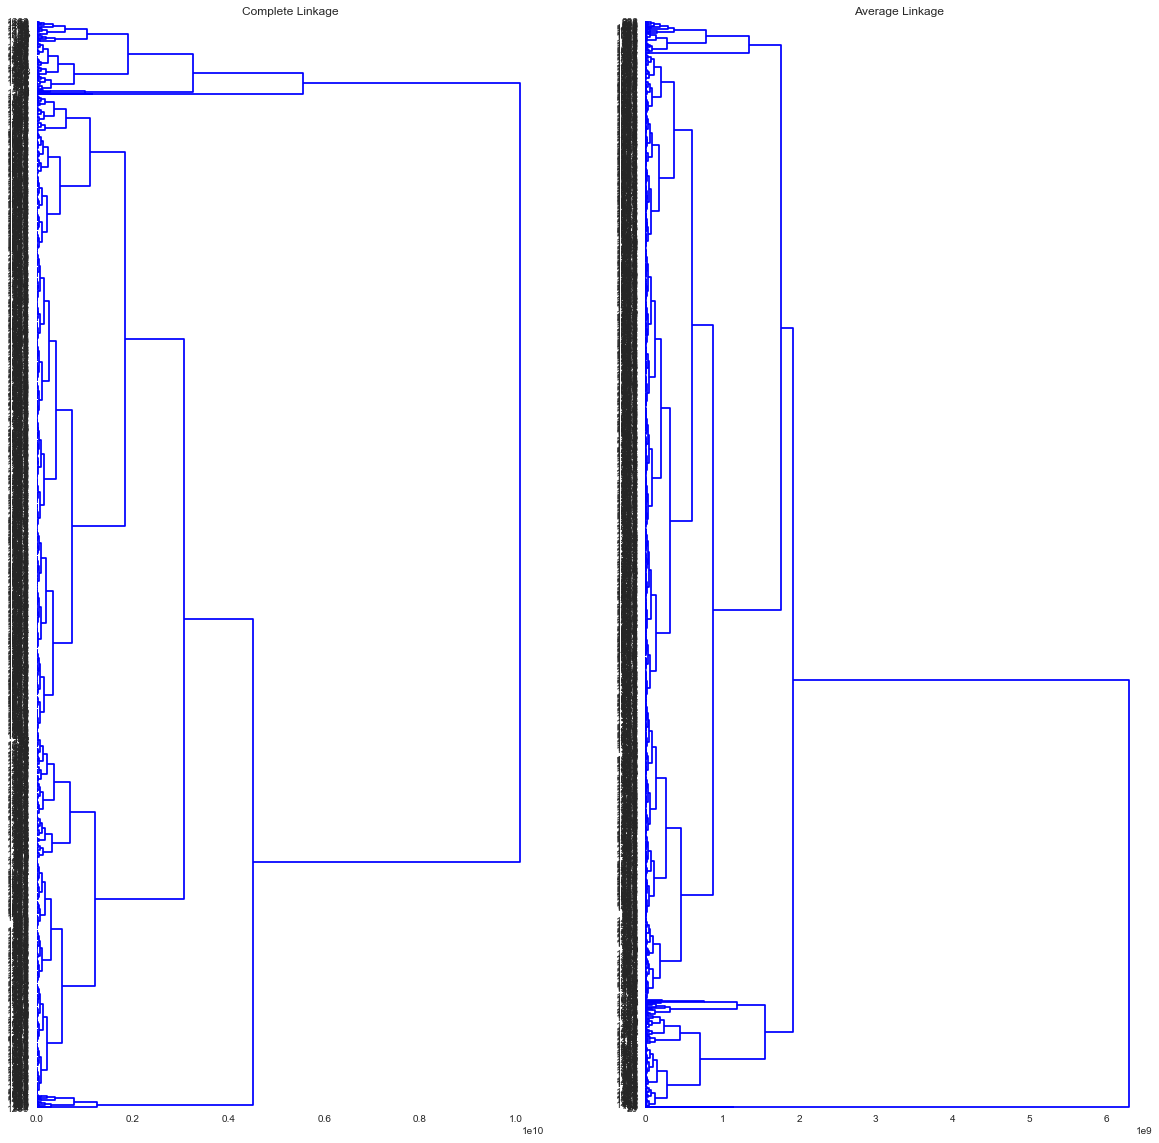

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,20))

for linkage, cluster, ax in zip([hierarchy.complete(gspc3), hierarchy.average(gspc3)],
                                ['c1','c2'],
                                [ax1,ax2]):
    cluster = hierarchy.dendrogram(linkage, orientation='right', color_threshold=0, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')

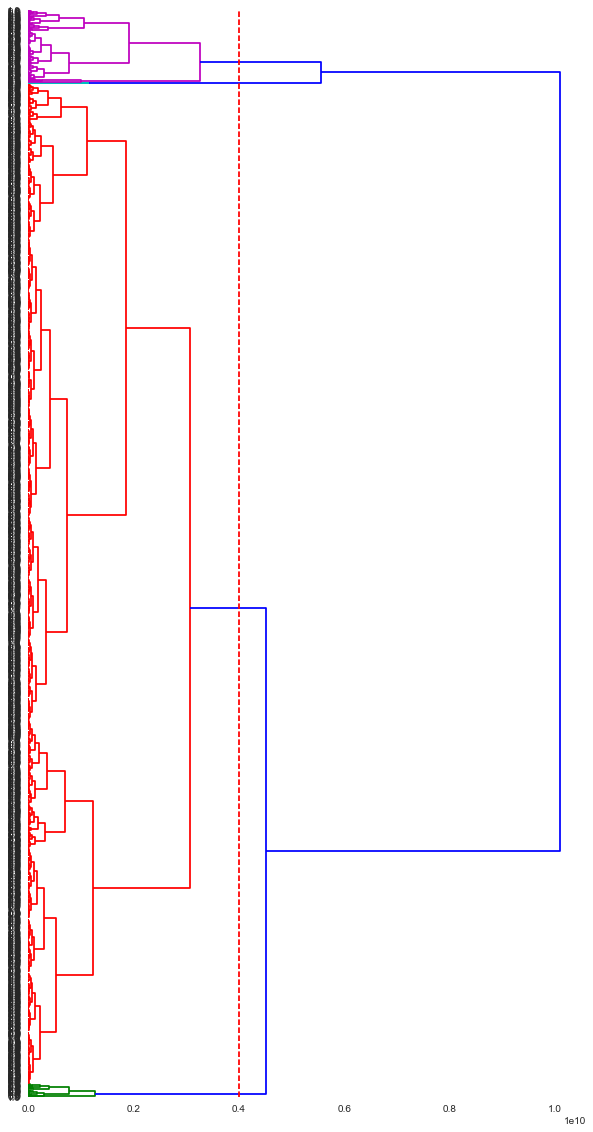

In [101]:
plt.figure(figsize=(10,20))
cut4 = hierarchy.dendrogram(hierarchy.complete(gspc3),
                            labels=gspc3.direction, orientation='right', color_threshold=4000000000, leaf_font_size=10)
plt.vlines(4000000000,0,plt.gca().yaxis.get_data_interval()[1], colors='r', linestyles='dashed');

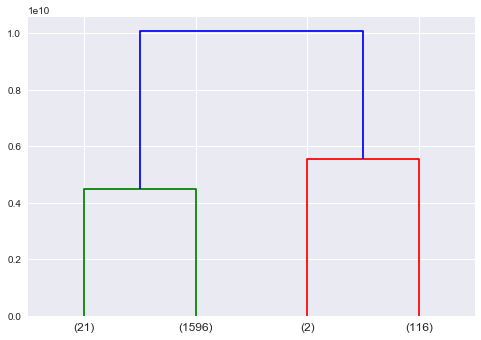

In [100]:
gspc3_cut4c = hierarchy.dendrogram(hierarchy.complete(gspc3), truncate_mode='lastp', p=4,
                             show_leaf_counts=True)
# See also color coding in plot above.

In [144]:
gspc3_cut4c.values()

dict_values([[[0.0, 4505790000.0001822, 4505790000.0001822, 0.0], [0.0, 5556619600.0000057, 5556619600.0000057, 0.0], [4505790000.0001822, 10081609600.000162, 10081609600.000162, 5556619600.0000057]], [3461, 3464, 3459, 3465], ['(21)', '(1596)', '(2)', '(116)'], [[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0]], ['g', 'r', 'b']])

In [149]:
np.random.seed(2)
gspc3_km4 = KMeans(n_clusters=5, n_init=50)
gspc3_km4.fit(gspc3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [150]:
# Observations per KMeans cluster
pd.Series(gspc3_km4.labels_).value_counts().sort_index()

0    599
1    708
2     44
3    148
4    236
dtype: int64

In [ ]:
gspc3_km4.labels_
gspc3.cluster

In [151]:
len(list(gspc3_km4.labels_))

1735

In [186]:
# gspc3 = gspc3.drop([0], axis=1)
# ser1 = pd.Series(data=list(gspc3_km4.labels_), index=gspc3.index)
# gspc3 = pd.concat([gspc3, ser1], axis=1)
gspc3.rename(columns={0: 'cluster'}, inplace=True)
gspc3.columns

Index(['Open', 'Volume', 'direction_lag1', 'direction_lag2', 'lr3_10_lag1',
       'lr3_10_lag2', 'lr3_10_lag3', 'direction', 'High_shift2', 'Low_shift2',
       'Close_shift2', 'Open_dev_close_shift2', 'High_dev_close_shift2',
       'Low_dev_close_shift2', 'cluster'],
      dtype='object')

In [187]:
cluster0 = gspc3[gspc3.cluster == 0]
print(cluster0.direction.value_counts())
cluster1 = gspc3[gspc3.cluster == 1]
print(cluster1.direction.value_counts())
cluster2 = gspc3[gspc3.cluster == 2]
print(cluster2.direction.value_counts())
cluster3 = gspc3[gspc3.cluster == 3]
print(cluster3.direction.value_counts(),cluster3.direction.value_counts()[0]+cluster3.direction.value_counts()[1] )
cluster4 = gspc3[gspc3.cluster == 4]
print(cluster4.direction.value_counts())

1.0    320
0.0    279
Name: direction, dtype: int64
1.0    393
0.0    315
Name: direction, dtype: int64
0.0    25
1.0    19
Name: direction, dtype: int64
1.0    80
0.0    68
Name: direction, dtype: int64 148
1.0    127
0.0    109
Name: direction, dtype: int64
